<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/keras_hyperparameter_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries:

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

tf.config.run_functions_eagerly(True)

# Generate Data:

### 1. Install the Kaggle library

In [3]:
!pip install kaggle --quiet

### 2. Configure your Kaggle API key

Download your `kaggle.json` file from your Kaggle account (Profile -> Account -> Create New API Token).

Then, upload this file to your Colab environment in the directory `~/.kaggle/` and set the correct permissions.

In [4]:
import os
from google.colab import files


# Upload kaggle.json
files.upload()


print("Kaggle API key configured successfully!")

Saving kaggle.json to kaggle.json
Kaggle API key configured successfully!


In [5]:
# Create .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle
# Move the uploaded kaggle.json to the correct directory
!mv kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json


### 3. Import `kagglehub` and download the dataset



In [6]:
import kagglehub
!kaggle datasets download -d mathchi/diabetes-data-set
!unzip diabetes-data-set.zip

Dataset URL: https://www.kaggle.com/datasets/mathchi/diabetes-data-set
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 33.0MB/s]
Archive:  diabetes-data-set.zip
  inflating: diabetes.csv            


# Curating the Data:

1.   Performing EDA on the data
2.   Dividingn data into dependant and Independant variable



In [7]:
df  = pd .read_csv('diabetes.csv')

In [8]:
print(df.head())
df.shape

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Performing Feature Scaling:

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Creating Training and Test sets:

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Create our Model:

In [13]:
Model = Sequential()
Model.add(Dense(32,input_dim=8,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.03)))
Model.add(Dense(1,activation="linear"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
Model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
ES = EarlyStopping(monitor="val_loss",
                   min_delta=0.00001,
                   patience=20,
                   verbose=1,
                   mode="auto",
                   baseline=None,
                   restore_best_weights=True,
                   )

In [17]:
history = Model.fit(X_train, y_train, epochs=1500, validation_data = (X_test,y_test),batch_size=32,verbose=1,callbacks=ES)

Epoch 1/1500


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6813 - loss: 2.4468 - val_accuracy: 0.7143 - val_loss: 1.6343
Epoch 2/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7185 - loss: 2.2363 - val_accuracy: 0.7273 - val_loss: 1.6071
Epoch 3/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.7225 - loss: 2.0294 - val_accuracy: 0.7532 - val_loss: 1.6593
Epoch 4/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.7447 - loss: 1.6610 - val_accuracy: 0.7468 - val_loss: 1.5708
Epoch 5/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.7199 - loss: 1.4489 - val_accuracy: 0.7273 - val_loss: 1.6749
Epoch 6/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.7454 - loss: 1.2612 - val_accuracy: 0.7403 - val_loss: 1.5779
Epoch 7/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7544 - loss: 1.3384 - val_accuracy: 0.7143 - val_loss: 1.3198
Epoch 8/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7381 - loss: 1.3458 - val_accuracy: 0.75

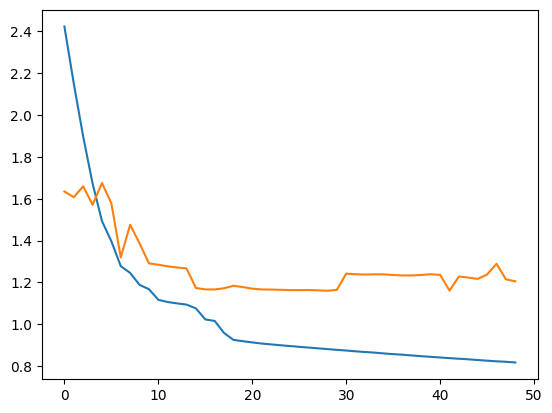

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

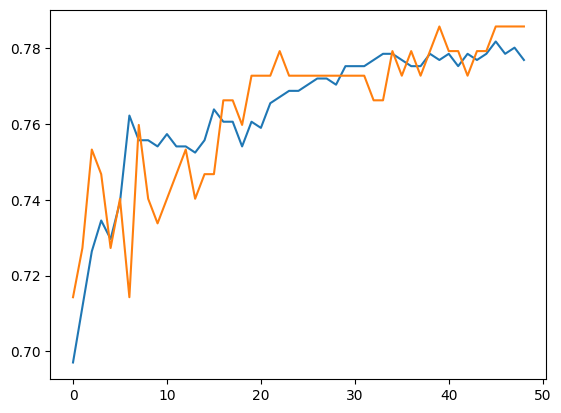

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# 1. How to select Appropriaate optimizer:

In [20]:
!pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 9.6 MB/s eta 0:00:00


In [21]:
import kerastuner as kt

/tmp/ipython-input-1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [22]:
 def build_model(hp):
  model  = Sequential()

  model.add(Dense(32,input_dim=8,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  # Create a function that helps us select the optimizer.
  optimizer = hp.Choice('optimizer',values = ['adam', 'sgd','rmsprop', 'adadelta'])
  model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [23]:
tuner = kt.RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='experiment_1',
    overwrite=True
)


In [24]:
tuner.search(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    verbose=1
)

tuner.results_summary()


Trial 4 Complete [00h 00m 11s]
accuracy: 0.7100977301597595

Best accuracy So Far: 0.7719869613647461
Total elapsed time: 00h 00m 47s
Results summary
Results in my_dir/experiment_1
Showing 10 best trials
Objective(name="accuracy", direction="max")

Trial 02 summary
Hyperparameters:
optimizer: rmsprop
Score: 0.7719869613647461

Trial 01 summary
Hyperparameters:
optimizer: adam
Score: 0.7687296271324158

Trial 03 summary
Hyperparameters:
optimizer: sgd
Score: 0.7100977301597595

Trial 00 summary
Hyperparameters:
optimizer: adadelta
Score: 0.5374592542648315


In [25]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [26]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8015 - loss: 0.4559 - val_accuracy: 0.7792 - val_loss: 0.5078
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7772 - loss: 0.4688 - val_accuracy: 0.7662 - val_loss: 0.5065
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.7787 - loss: 0.4690 - val_accuracy: 0.7597 - val_loss: 0.5053
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.7553 - loss: 0.4742 - val_accuracy: 0.7662 - val_loss: 0.5040
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.7589 - loss: 0.4738 - val_accuracy: 0.7597 - val_loss: 0.5026
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.8008 - loss: 0.4565 - val_accuracy: 0.7727 - val_loss: 0.5022
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7959 - loss: 0.4431 - val_accuracy: 0.7727 - val_loss: 0.5022
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7772 - loss: 0.4391 - val_accu

In [29]:
def build_model(hp):
  model = Sequential()
  units = hp.Int('units',min_value=8,max_value=128,step=8)
  model.add(Dense(units=units,activation='relu',input_dim=8))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [30]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='experiment_1',
    overwrite=True
)


In [32]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=10)
tuner.results_summary()

Results summary
Results in my_dir/experiment_1
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 03 summary
Hyperparameters:
units: 72
Score: 0.8116883039474487

Trial 08 summary
Hyperparameters:
units: 96
Score: 0.798701286315918

Trial 00 summary
Hyperparameters:
units: 32
Score: 0.7792207598686218

Trial 01 summary
Hyperparameters:
units: 56
Score: 0.7727272510528564

Trial 02 summary
Hyperparameters:
units: 112
Score: 0.7727272510528564

Trial 06 summary
Hyperparameters:
units: 128
Score: 0.7662337422370911

Trial 07 summary
Hyperparameters:
units: 88
Score: 0.7662337422370911

Trial 09 summary
Hyperparameters:
units: 24
Score: 0.7662337422370911

Trial 05 summary
Hyperparameters:
units: 64
Score: 0.7467532753944397

Trial 04 summary
Hyperparameters:
units: 8
Score: 0.7207792401313782


In [35]:
tuner.get_best_hyperparameters()[0].values

{'units': 72}

In [39]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=11)

Epoch 12/100
 3/20 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9010 - loss: 0.3157

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8445 - loss: 0.3844
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8231 - loss: 0.3695
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8222 - loss: 0.3716
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8268 - loss: 0.3847
Epoch 16/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8148 - loss: 0.3938
Epoch 17/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8222 - loss: 0.4040
Epoch 18/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.8357 - loss: 0.3809
Epoch 19/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8085 - loss: 0.4159
Epoch 20/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7839 - loss: 0.4300
Epoch 21/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7980 - loss: 0.3964
Epoch 22/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8346 - loss: 0.3518
Epoch 23/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - a

In [40]:
def build_model(hp):
  model = Sequential()
  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    model.add(Dense(72,activation="relu",input_dim=8))
    model.add(Dense(1,activation="sigmoid"))

    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [41]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=3,
                        directory='my_dir1',
                        project_name='num_layers'
                        )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5,verbose=1)
tuner.results_summary()

Trial 3 Complete [00h 00m 07s]
val_accuracy: 0.7402597665786743

Best val_accuracy So Far: 0.798701286315918
Total elapsed time: 00h 00m 17s
Results summary
Results in my_dir1/num_layers
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
num_layers: 7
Score: 0.798701286315918

Trial 0 summary
Hyperparameters:
num_layers: 3
Score: 0.7532467246055603

Trial 2 summary
Hyperparameters:
num_layers: 4
Score: 0.7402597665786743


In [43]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 7}

In [44]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [57]:
def build_model(hp):
  model = Sequential()
  counter = 0
  for i in range(hp.Int("num_layers", min_value=1, max_value=10)):
    if counter == 0:
      model.add(Dense(hp.Int('units' + str(i),min_value=8,max_value=128,step=8),
                      activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid']), input_dim=8))
      model.add(Dropout(0.25))
    else:
       model.add(Dense(hp.Int('units' + str(i),min_value=8,max_value=128,step=8),
                      activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid'])))
       model.add(Dropout(0.25))
    counter+=1

  model.add(Dense(1,activation="sigmoid"))


  model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd', 'nadam','adadelta']),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
  return model

In [58]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        directory='my_dir',
                        project_name='last_hope')

Reloading Tuner from my_dir/last_hope/tuner0.json


In [59]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

In [60]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'units0': 104,
 'activation0': 'tanh',
 'optimizer': 'rmsprop',
 'units1': 88,
 'activation1': 'sigmoid',
 'units2': 56,
 'activation2': 'relu',
 'units3': 128,
 'activation3': 'relu',
 'units4': 80,
 'activation4': 'sigmoid',
 'units5': 72,
 'activation5': 'sigmoid',
 'units6': 88,
 'activation6': 'sigmoid'}

In [61]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [56]:
model.fit(X_train,y_train,epochs=100,batch_size=32,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.7577 - loss: 0.4791 - val_accuracy: 0.7857 - val_loss: 0.4943
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.7755 - loss: 0.4655 - val_accuracy: 0.7078 - val_loss: 0.5200
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7705 - loss: 0.4650 - val_accuracy: 0.7532 - val_loss: 0.4960
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7638 - loss: 0.4961 - val_accuracy: 0.7857 - val_loss: 0.5143
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7333 - loss: 0.4952 - val_accuracy: 0.7532 - val_loss: 0.5099
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7555 - loss: 0.4666 - val_accuracy: 0.7208 - val_loss: 0.5182
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7806 - loss: 0.4597 - val_accuracy: 0.7403 - val_loss: 0.5115
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7568 - loss: 0.4734 - val_accuracy: 0.7597 -